<a href="https://colab.research.google.com/github/rapt6r/TCS_dfDiamonds/blob/main/Diamonds_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Possible Research Questions to answer:

- What combinations of cut, clarity, and color result in the highest average prices? - DONE
- Does clarity have a strong relationship with price?
- How does diamond weight affect price?
- Which cut quality has the highest average price?
- What is the distribution of diamond prices?

In [37]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("shivam2503/diamonds")

# Data
df = pd.read_csv(path + "/diamonds.csv")

# Renamed based on content given
df = df.rename(columns = {"x": "length in mm", "y": "width in mm", "z": "depth in mm"})

# Drop useless row
df = df.drop("Unnamed: 0", axis = 1)

# Drops zeros in these columns
df = df[(df["length in mm"] > 0) & (df["width in mm"] > 0) & (df["depth in mm"] > 0)]

# Creates list that turns grading into numbers
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
clarity_numbers = {clarity: i+1 for i, clarity in enumerate(clarity_order)}

color_order = ["J", "I", "H", "G", "F", "E", "D"]
color_numbers = {color: i+1 for i, color in enumerate(color_order)}

# Replace letters with numbers from row
df["clarity"] = df["clarity"].map(clarity_numbers)
df["color"] = df["color"].map(color_numbers)

df

,carat,cut,color,clarity,depth,table,price,length in mm,width in mm,depth in mm
0,0.23,Ideal,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [38]:
# What combinations of cut, clarity, and color result in the highest average prices?

# Group by cut, clarity, and color, then calculate the average price
grouped = df.groupby(["cut", "clarity", "color"])["price"].mean().reset_index()

# Sort by average price descending
top_combinations = grouped.sort_values(by="price", ascending=False)
top10 = top_combinations.head(10).copy()
print(top10)


           cut  clarity  color         price
275  Very Good        8      7  10298.260870
107       Good        8      7  10030.333333
108      Ideal        1      1   9454.000000
219    Premium        8      7   9056.500000
171    Premium        2      1   7550.285714
6         Fair        1      7   7383.000000
206    Premium        7      1   7244.375000
116      Ideal        2      2   7191.912409
186    Premium        4      2   7156.346032
172    Premium        2      2   7148.483974


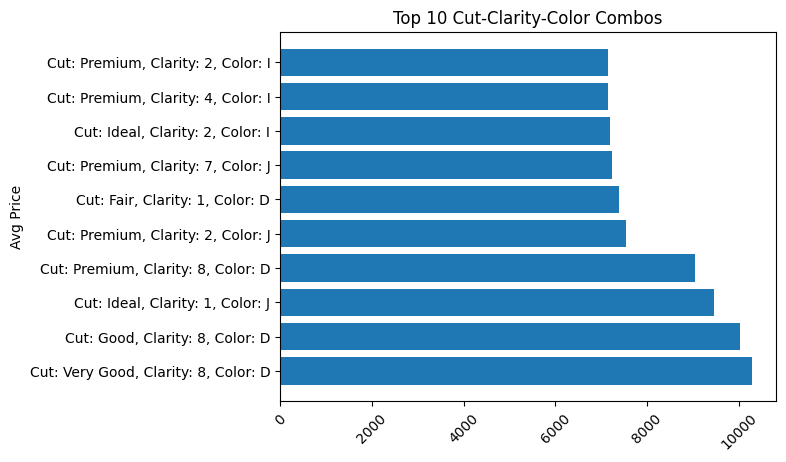

In [39]:
# Plot of data above
top10_numbers_to_colors = {
    1: "J",
    2: "I",
    3: "H",
    4: "G",
    5: "F",
    6: "E",
    7: "D"
}

top10["color letter"] = top10["color"].map(top10_numbers_to_colors)


labels = "Cut: " + top10["cut"] + ", Clarity: " + top10["clarity"].astype(str)+ ", Color: " + top10["color letter"]

plt.barh(labels, top10["price"])
plt.xticks(rotation=45)
plt.ylabel("Avg Price")
plt.title("Top 10 Cut-Clarity-Color Combos")


plt.show()
